In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data collection of 30 crypto currencies

In [ ]:
import yfinance as yf, pandas as pd, glob, os, time, sys
from pathlib import Path
from datetime import datetime
from dateutil.relativedelta import relativedelta
import shutil

OUT_DIR = Path("/content/drive/MyDrive/COM724/30_cryptosets")

if OUT_DIR.exists():
    shutil.rmtree(OUT_DIR)
OUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"✅ Emptied folder: {OUT_DIR}")
OUT_DIR.mkdir(parents=True, exist_ok=True)


name_to_ticker = {
    "Aave": "AAVE-USD","Cardano": "ADA-USD","Algorand": "ALGO-USD","Arweave": "AR-USD",
    "Cosmos": "ATOM-USD","Avalanche": "AVAX-USD","Binance Coin": "BNB-USD","Bitcoin": "BTC-USD",
    "PancakeSwap": "CAKE-USD","Litecoin": "LTC-USD","Curve DAO Token": "CRV-USD","Dash": "DASH-USD",
    "Dogecoin": "DOGE-USD","Enjin Coin": "ENJ-USD","EOS": "EOS-USD","Ethereum": "ETH-USD",
    "Filecoin": "FIL-USD","Internet Computer": "ICP-USD","Chainlink": "LINK-USD","Monero": "XMR-USD",
    "NEO": "NEO-USD","Shiba Inu": "SHIB-USD","Solana": "SOL-USD","TRON": "TRX-USD",
    "VeChain": "VET-USD","Stellar": "XLM-USD","Zcash": "ZEC-USD","The Sandbox": "SAND-USD",
    "Decentraland": "MANA-USD","Quant": "QNT-USD"
}

tickers = list(name_to_ticker.values())
end_date = datetime.today().date()
start_date = (end_date - relativedelta(years=4)).isoformat()
end_date = end_date.isoformat()

for i, (name, ticker) in enumerate(name_to_ticker.items(), 1):
    out_path = OUT_DIR / f"{ticker}.csv"
    try:
        df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)
        if df is None or df.empty:
            print(f"[{i}/{len(tickers)}] WARNING: no data for {ticker}")
            continue
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [' '.join([str(x) for x in col if str(x) != '']).strip() for col in df.columns.values]
        df = df.reset_index()
        rename_map = {}
        for c in df.columns:
            lc = c.lower()
            if 'date' in lc: rename_map[c] = 'Date'
            elif lc.startswith('open'): rename_map[c] = 'Open'
            elif lc.startswith('high'): rename_map[c] = 'High'
            elif lc.startswith('low'): rename_map[c] = 'Low'
            elif 'adj' in lc and 'close' in lc: rename_map[c] = 'Adj Close'
            elif lc.startswith('close'): rename_map[c] = 'Close'
            elif 'volume' in lc: rename_map[c] = 'Volume'
        df = df.rename(columns=rename_map)
        df["Name"] = name
        df["Symbol"] = ticker
        ordered = ["Date","Name","Symbol","Open","High","Low","Close","Adj Close","Volume"]
        df = df[[c for c in ordered if c in df.columns]]
        df.to_csv(out_path, index=False)
        print(f"[{i}/{len(tickers)}] Saved {name} ({ticker}) rows:{len(df)}")
        time.sleep(1)
    except KeyboardInterrupt:
        print("Interrupted"); sys.exit(1)
    except Exception as e:
        print(f"[{i}/{len(tickers)}] ERROR {ticker}: {e}"); time.sleep(1)

data_path = "/content/drive/MyDrive/COM724/30_cryptosets"
save_path = "/content/drive/MyDrive/COM724/final_dataset/final_dataset.csv"

all_files = glob.glob(os.path.join(data_path, "*.csv"))
final_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
final_df = final_df.sort_values(["Symbol","Date"]).reset_index(drop=True)
final_df.to_csv(save_path, index=False)

print(f"\n✅ Merged {len(all_files)} files.")
print(f"✅ Final shape: {final_df.shape}")
print(f"✅ Saved merged dataset to: {save_path}")

✅ Emptied folder: /content/drive/MyDrive/COM724/30_cryptosets
[1/30] Saved Aave (AAVE-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)
/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[2/30] Saved Cardano (ADA-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[3/30] Saved Algorand (ALGO-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[4/30] Saved Arweave (AR-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[5/30] Saved Cosmos (ATOM-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[6/30] Saved Avalanche (AVAX-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[7/30] Saved Binance Coin (BNB-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[8/30] Saved Bitcoin (BTC-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[9/30] Saved PancakeSwap (CAKE-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[10/30] Saved Litecoin (LTC-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[11/30] Saved Curve DAO Token (CRV-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[12/30] Saved Dash (DASH-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[13/30] Saved Dogecoin (DOGE-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[14/30] Saved Enjin Coin (ENJ-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[15/30] Saved EOS (EOS-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[16/30] Saved Ethereum (ETH-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[17/30] Saved Filecoin (FIL-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[18/30] Saved Internet Computer (ICP-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[19/30] Saved Chainlink (LINK-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[20/30] Saved Monero (XMR-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[21/30] Saved NEO (NEO-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[22/30] Saved Shiba Inu (SHIB-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[23/30] Saved Solana (SOL-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[24/30] Saved TRON (TRX-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[25/30] Saved VeChain (VET-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[26/30] Saved Stellar (XLM-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[27/30] Saved Zcash (ZEC-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[28/30] Saved The Sandbox (SAND-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[29/30] Saved Decentraland (MANA-USD) rows:1460


/tmp/ipython-input-3503663253.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, interval="1d", progress=False)


[30/30] Saved Quant (QNT-USD) rows:1460

✅ Merged 30 files.
✅ Final shape: (43800, 8)
✅ Saved merged dataset to: /content/drive/MyDrive/COM724/final_dataset/final_dataset.csv


In [ ]:
file_path = '/content/drive/MyDrive/COM724/final_dataset/final_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Date,Name,Symbol,Open,High,Low,Close,Volume
0,2021-11-14,Aave,AAVE-USD,312.857727,317.384705,309.565674,315.605865,222070493
1,2021-11-15,Aave,AAVE-USD,315.306458,317.225677,300.292419,301.218567,273413856
2,2021-11-16,Aave,AAVE-USD,302.103699,321.076996,266.394257,278.808441,447717631
3,2021-11-17,Aave,AAVE-USD,278.582184,285.790436,270.404755,284.166687,368404534
4,2021-11-18,Aave,AAVE-USD,284.498596,287.904877,256.635864,262.411255,357912089


#Data Preprocessing

In [ ]:
missing_data = df.isnull().sum()

print("Missing data per column:")
print(missing_data)

Missing data per column:
Date      0
Name      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
df.dtypes

,0
Date,object
Name,object
Symbol,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [ ]:
#let's fix datatypes of date, name, symbol, volume
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Name'] = df['Name'].astype('string')
df['Symbol'] = df['Symbol'].astype('string')
df['Volume'] = df['Volume'].astype(float)

df.dtypes

,0
Date,datetime64[ns]
Name,string[python]
Symbol,string[python]
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64


In [ ]:
duplicate_rows_all = df[df.duplicated(keep=False)]

num_duplicate_rows_all = len(duplicate_rows_all)
print(f"Number of duplicate rows across all columns: {num_duplicate_rows_all}")

print("\nDuplicate rows across all columns:")
display(duplicate_rows_all)

Number of duplicate rows across all columns: 0

Duplicate rows across all columns:


,Date,Name,Symbol,Open,High,Low,Close,Volume


In [ ]:
df.head()

,Date,Name,Symbol,Open,High,Low,Close,Volume
0,2021-11-14,Aave,AAVE-USD,312.857727,317.384705,309.565674,315.605865,222070493.0
1,2021-11-15,Aave,AAVE-USD,315.306458,317.225677,300.292419,301.218567,273413856.0
2,2021-11-16,Aave,AAVE-USD,302.103699,321.076996,266.394257,278.808441,447717631.0
3,2021-11-17,Aave,AAVE-USD,278.582184,285.790436,270.404755,284.166687,368404534.0
4,2021-11-18,Aave,AAVE-USD,284.498596,287.904877,256.635864,262.411255,357912089.0


In [ ]:
import pandas as pd

all_dates = pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="D")

aligned = []
for sym, df_sym in df.groupby("Symbol"):
    df_sym = df_sym.set_index("Date").reindex(all_dates)
    df_sym["Symbol"] = sym
    df_sym = df_sym.ffill().bfill().reset_index().rename(columns={"index": "Date"})
    aligned.append(df_sym)

df = pd.concat(aligned).sort_values(["Symbol", "Date"]).reset_index(drop=True)

print("Reindexed shape:", df.shape)
print("Date range:", df['Date'].min(), "to", df['Date'].max())

Reindexed shape: (43800, 8)
Date range: 2021-11-14 00:00:00 to 2025-11-12 00:00:00


### Exploratory data analysis

In [ ]:
df['Symbol'] = df['Symbol'].astype('string')

In [ ]:
print(f'rows and columns {df.shape}')#
print(df.dtypes)
print(df.Symbol.unique())
df.head()

rows and columns (43800, 8)
Date      datetime64[ns]
Name      string[python]
Symbol    string[python]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object
<StringArray>
['AAVE-USD',  'ADA-USD', 'ALGO-USD',   'AR-USD', 'ATOM-USD', 'AVAX-USD',
  'BNB-USD',  'BTC-USD', 'CAKE-USD',  'CRV-USD', 'DASH-USD', 'DOGE-USD',
  'ENJ-USD',  'EOS-USD',  'ETH-USD',  'FIL-USD',  'ICP-USD', 'LINK-USD',
  'LTC-USD', 'MANA-USD',  'NEO-USD',  'QNT-USD', 'SAND-USD', 'SHIB-USD',
  'SOL-USD',  'TRX-USD',  'VET-USD',  'XLM-USD',  'XMR-USD',  'ZEC-USD']
Length: 30, dtype: string


,Date,Name,Symbol,Open,High,Low,Close,Volume
0,2021-11-14,Aave,AAVE-USD,312.857727,317.384705,309.565674,315.605865,222070493.0
1,2021-11-15,Aave,AAVE-USD,315.306458,317.225677,300.292419,301.218567,273413856.0
2,2021-11-16,Aave,AAVE-USD,302.103699,321.076996,266.394257,278.808441,447717631.0
3,2021-11-17,Aave,AAVE-USD,278.582184,285.790436,270.404755,284.166687,368404534.0
4,2021-11-18,Aave,AAVE-USD,284.498596,287.904877,256.635864,262.411255,357912089.0


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,43800,43800.000000,43800.000000,43800.000000,43800.000000,4.380000e+04
mean,2023-11-13 12:00:00,1957.632215,1993.338616,1920.156935,1958.327497,2.129033e+09
min,2021-11-14 00:00:00,0.000007,0.000007,0.000006,0.000007,1.809250e+05
25%,2022-11-13 18:00:00,0.376158,0.387941,0.362108,0.375485,5.970480e+07
50%,2023-11-13 12:00:00,6.632179,6.836927,6.403482,6.621218,1.639572e+08
75%,2024-11-12 06:00:00,69.256428,71.403208,67.216415,69.241549,5.465538e+08
max,2025-11-12 00:00:00,124752.140625,126198.070312,123196.046875,124752.531250,1.817464e+11
std,NaN,11422.118557,11616.147295,11218.125705,11427.671186,8.046389e+09


In [ ]:
#date for every coin to ensure all coins have same start and end date
df.groupby('Symbol')['Date'].agg(['min', 'max'])

,min,max
Symbol,,
AAVE-USD,2021-11-14,2025-11-12
ADA-USD,2021-11-14,2025-11-12
ALGO-USD,2021-11-14,2025-11-12
AR-USD,2021-11-14,2025-11-12
ATOM-USD,2021-11-14,2025-11-12
AVAX-USD,2021-11-14,2025-11-12
BNB-USD,2021-11-14,2025-11-12
BTC-USD,2021-11-14,2025-11-12
CAKE-USD,2021-11-14,2025-11-12


In [ ]:
#calculate mean, median, std, min, max for numeric columns (Open, High, Low, Close, Volume)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
df[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])

,Open,High,Low,Close,Volume
mean,1957.632215,1993.338616,1920.156935,1958.327497,2.129033e+09
median,6.632179,6.836927,6.403482,6.621218,1.639572e+08
std,11422.118557,11616.147295,11218.125705,11427.671186,8.046389e+09
min,0.000007,0.000007,0.000006,0.000007,1.809250e+05
max,124752.140625,126198.070312,123196.046875,124752.531250,1.817464e+11


In [ ]:
#Compare volatality between coins (standard deviation of close)
df.groupby('Symbol')['Close'].std().sort_values(ascending=False)


,Close
Symbol,
BTC-USD,31759.847379
ETH-USD,916.917575
BNB-USD,216.264522
AAVE-USD,81.941977
SOL-USD,71.217864
ZEC-USD,64.384346
XMR-USD,58.522695
DASH-USD,32.828886
QNT-USD,30.389447


In [ ]:
#identify highest and lowest average price coins
df.groupby('Symbol')['Close'].mean().sort_values(ascending=False)


,Close
Symbol,
BTC-USD,54928.971523
ETH-USD,2510.580766
BNB-USD,466.251112
XMR-USD,186.264497
AAVE-USD,141.633957
QNT-USD,106.687902
SOL-USD,105.236976
LTC-USD,88.035911
ZEC-USD,61.303210


In [ ]:
# heatmap of all 30 crypto currencies
import seaborn as sns
import matplotlib.pyplot as plt


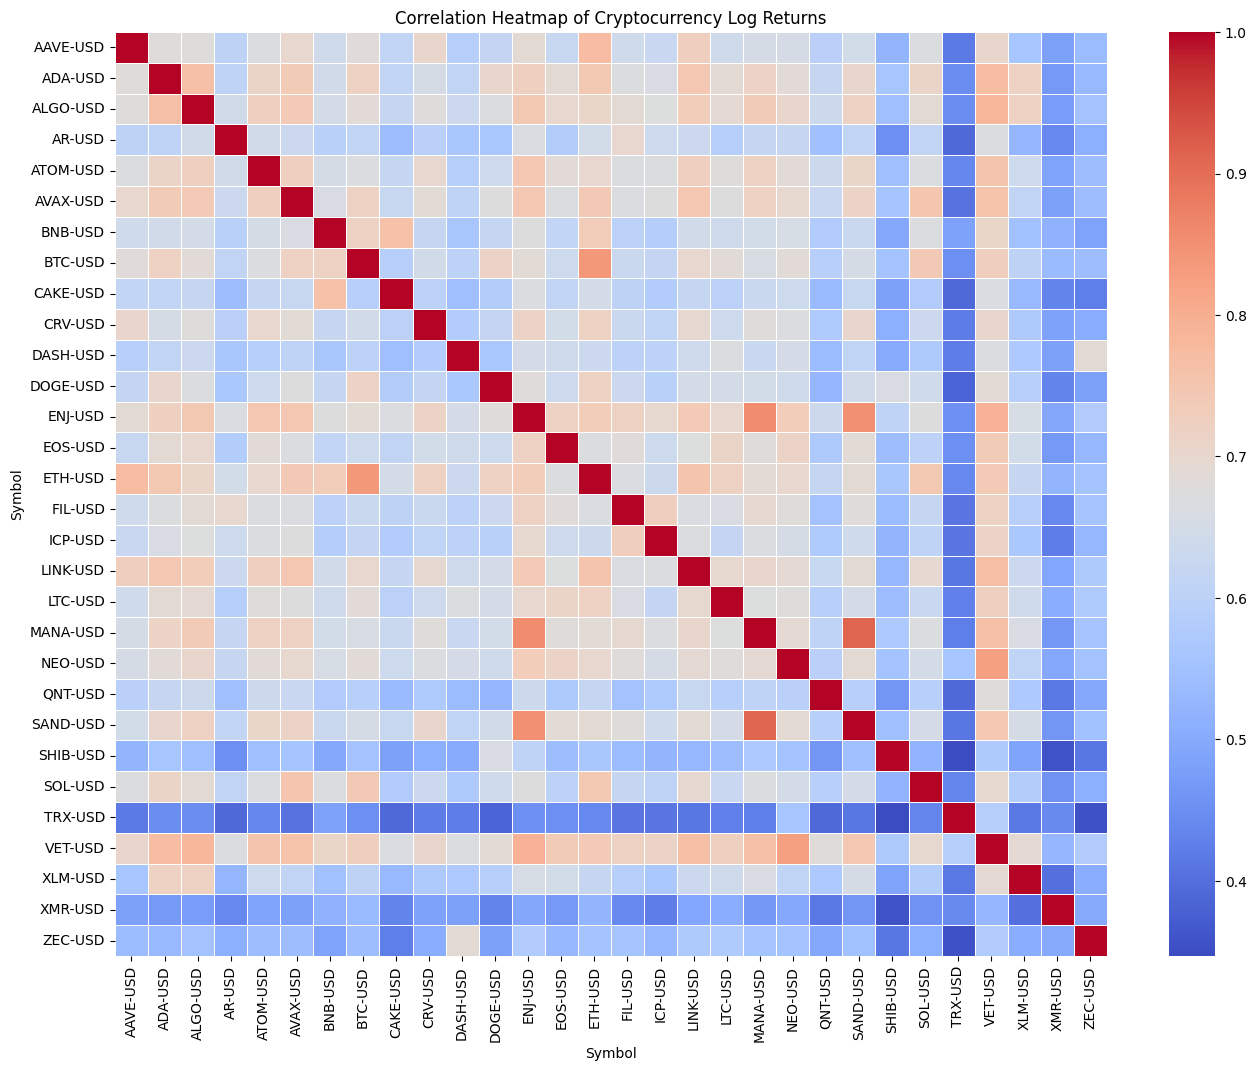

In [ ]:
corr_matrix = pivot.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Cryptocurrency Log Returns')
plt.show()

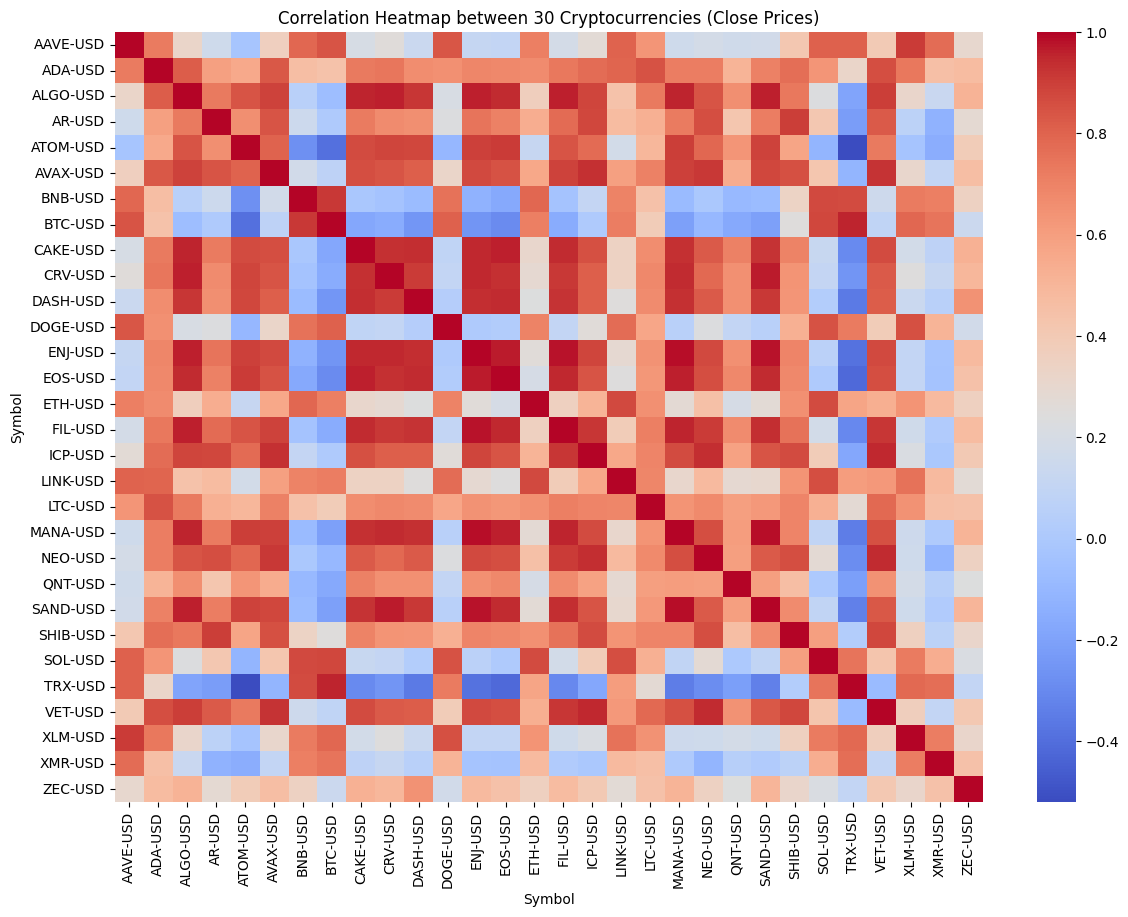

In [ ]:
close_prices = df.pivot(index='Date', columns='Symbol', values='Close')
corr_matrix = close_prices.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap between 30 Cryptocurrencies (Close Prices)')
plt.show()


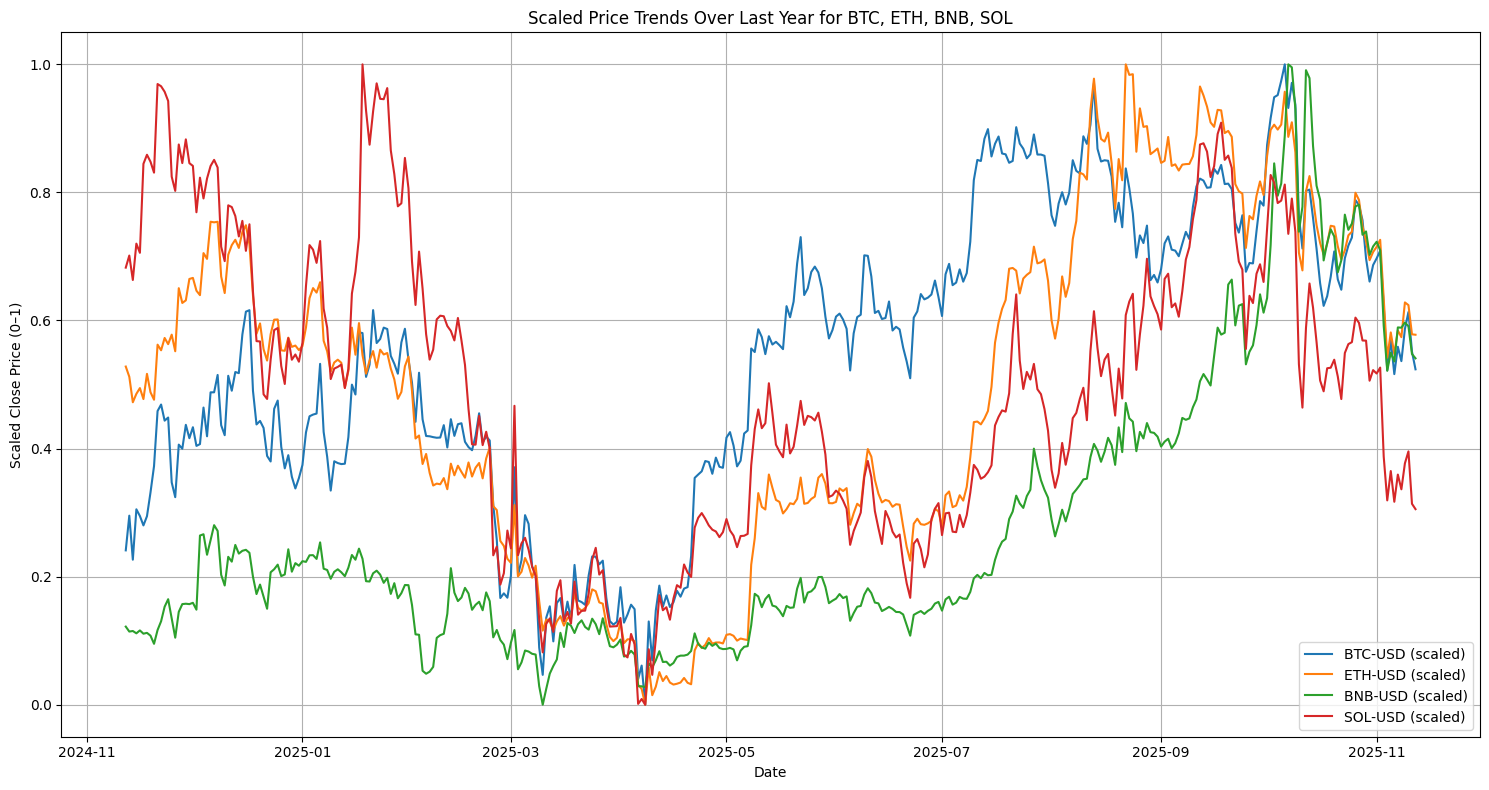

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

selected_symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD']

filtered_df = df[df['Symbol'].isin(selected_symbols)].copy()

# Convert Date to datetime
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])

# Filter last 1 year
one_year_ago = filtered_df['Date'].max() - pd.DateOffset(years=1)

plt.figure(figsize=(15, 8))

scaler = MinMaxScaler()

for symbol in selected_symbols:
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]

    # Filter for last year
    symbol_df_last_year = symbol_df[symbol_df['Date'] >= one_year_ago]

    # Scale Close price for each coin separately
    scaled_close = scaler.fit_transform(symbol_df_last_year[['Close']])

    plt.plot(symbol_df_last_year['Date'], scaled_close, label=f"{symbol} (scaled)")

plt.title('Scaled Price Trends Over Last Year for BTC, ETH, BNB, SOL')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price (0–1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#find daily returns and percnetage of daily returns and log returns

In [ ]:
#sort data  by dates
df = df.sort_values(["Symbol", "Date"]).reset_index(drop=True)

df["Daily_Return"] = df.groupby("Symbol")["Close"].pct_change()

df["Daily_Return_%"] = df["Daily_Return"] * 100

df["Log_Return"] = df.groupby("Symbol")["Close"].transform(lambda x: np.log(x) - np.log(x.shift(1)))

display(df[["Symbol", "Date", "Close", "Daily_Return", "Daily_Return_%", "Log_Return"]].head(10))

,Symbol,Date,Close,Daily_Return,Daily_Return_%,Log_Return
0,AAVE-USD,2021-11-14,315.605865,NaN,NaN,NaN
1,AAVE-USD,2021-11-15,301.218567,-0.045586,-4.558628,-0.046658
2,AAVE-USD,2021-11-16,278.808441,-0.074398,-7.439822,-0.077311
3,AAVE-USD,2021-11-17,284.166687,0.019218,1.921838,0.019036
4,AAVE-USD,2021-11-18,262.411255,-0.076559,-7.655870,-0.079648
5,AAVE-USD,2021-11-19,279.030579,0.063333,6.333312,0.061408
6,AAVE-USD,2021-11-20,274.149750,-0.017492,-1.749209,-0.017647
7,AAVE-USD,2021-11-21,267.098877,-0.025719,-2.571906,-0.026056
8,AAVE-USD,2021-11-22,263.133453,-0.014846,-1.484628,-0.014958
9,AAVE-USD,2021-11-23,269.739594,0.025106,2.510566,0.024796


reindex dates

In [ ]:
df.Name.unique()

<StringArray>
[             'Aave',           'Cardano',          'Algorand',
           'Arweave',            'Cosmos',         'Avalanche',
      'Binance Coin',           'Bitcoin',       'PancakeSwap',
   'Curve DAO Token',              'Dash',          'Dogecoin',
        'Enjin Coin',               'EOS',          'Ethereum',
          'Filecoin', 'Internet Computer',         'Chainlink',
          'Litecoin',      'Decentraland',               'NEO',
             'Quant',       'The Sandbox',         'Shiba Inu',
            'Solana',              'TRON',           'VeChain',
           'Stellar',            'Monero',             'Zcash']
Length: 30, dtype: string

normalisation of log values

In [ ]:
from sklearn.preprocessing import StandardScaler

pivot = df.pivot(index="Date", columns="Symbol", values="Log_Return").fillna(0)

X = pivot.T

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Normalized shape:", X_scaled.shape)

Normalized shape: (30, 1460)


In [ ]:
df.head()

,Date,Name,Symbol,Open,High,Low,Close,Volume,Daily_Return,Daily_Return_%,Log_Return
0,2021-11-14,Aave,AAVE-USD,312.857727,317.384705,309.565674,315.605865,222070493.0,NaN,NaN,NaN
1,2021-11-15,Aave,AAVE-USD,315.306458,317.225677,300.292419,301.218567,273413856.0,-0.045586,-4.558628,-0.046658
2,2021-11-16,Aave,AAVE-USD,302.103699,321.076996,266.394257,278.808441,447717631.0,-0.074398,-7.439822,-0.077311
3,2021-11-17,Aave,AAVE-USD,278.582184,285.790436,270.404755,284.166687,368404534.0,0.019218,1.921838,0.019036
4,2021-11-18,Aave,AAVE-USD,284.498596,287.904877,256.635864,262.411255,357912089.0,-0.076559,-7.655870,-0.079648


PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=42)

X_pca = pca.fit_transform(X_scaled)

print("PCA-transformed shape:", X_pca.shape)
print("Explained variance ratio (first 20 components):")
print(pca.explained_variance_ratio_)

total_variance = pca.explained_variance_ratio_.sum()
print("Total variance explained by first 20 components:", round(total_variance * 100, 2), "%")


PCA-transformed shape: (30, 20)
Explained variance ratio (first 20 components):
[0.11412724 0.07341272 0.06350337 0.05798539 0.05371886 0.04858786
 0.04454421 0.04283702 0.04017971 0.03808747 0.0372637  0.03303664
 0.03150378 0.03018117 0.02901325 0.02797503 0.02734608 0.02592134
 0.02469743 0.02314608]
Total variance explained by first 20 components: 86.71 %


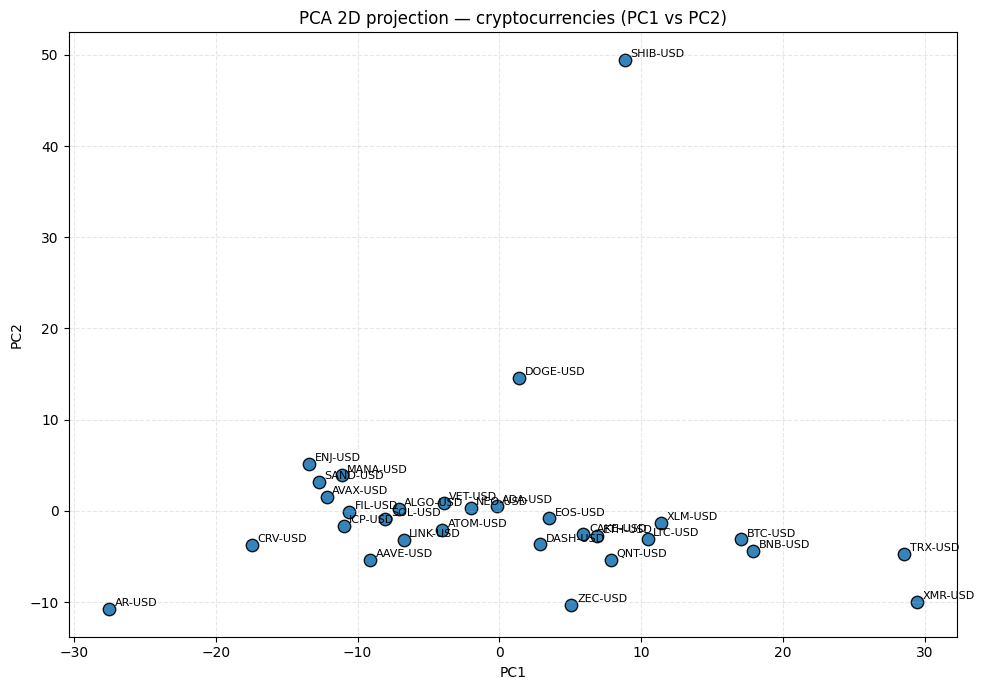

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2, random_state=42)
X_2d = pca2.fit_transform(X_scaled)

symbols = pivot.columns.tolist()

plt.figure(figsize=(10,7))
plt.scatter(X_2d[:,0], X_2d[:,1], s=80, edgecolor='k', alpha=0.9)

for i, sym in enumerate(symbols):
    plt.annotate(sym, (X_2d[i,0], X_2d[i,1]), fontsize=8, xytext=(4,2), textcoords='offset points')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D projection — cryptocurrencies (PC1 vs PC2)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

k = 4

km = KMeans(n_clusters=k, n_init=20, random_state=42)
labels = km.fit_predict(X_pca)

sil_score = silhouette_score(X_pca, labels)

cluster_df = pd.DataFrame({"Symbol": symbols, "Cluster": labels})

print("KMeans clusters (k={}):".format(k))
print(cluster_df.groupby("Cluster").size())
print("Silhouette score:", round(sil_score, 4))

centroids = km.cluster_centers_
rep_list = []
for cid in range(k):
    idxs = np.where(labels == cid)[0]
    if len(idxs) == 0:
        rep_list.append((cid, None))
        continue
    dists = np.linalg.norm(X_pca[idxs] - centroids[cid], axis=1)
    rep_idx = idxs[np.argmin(dists)]
    rep_list.append((cid, symbols[rep_idx]))

rep_df = pd.DataFrame(rep_list, columns=["Cluster", "Representative"])
print("\nCluster representatives:")
print(rep_df)

cluster_df.to_csv("cluster_results.csv", index=False)
rep_df.to_csv("cluster_representatives.csv", index=False)


KMeans clusters (k=4):
Cluster
0    14
1    14
2     1
3     1
dtype: int64
Silhouette score: 0.0659

Cluster representatives:
   Cluster Representative
0        0        VET-USD
1        1        ETH-USD
2        2        CRV-USD
3        3       SHIB-USD


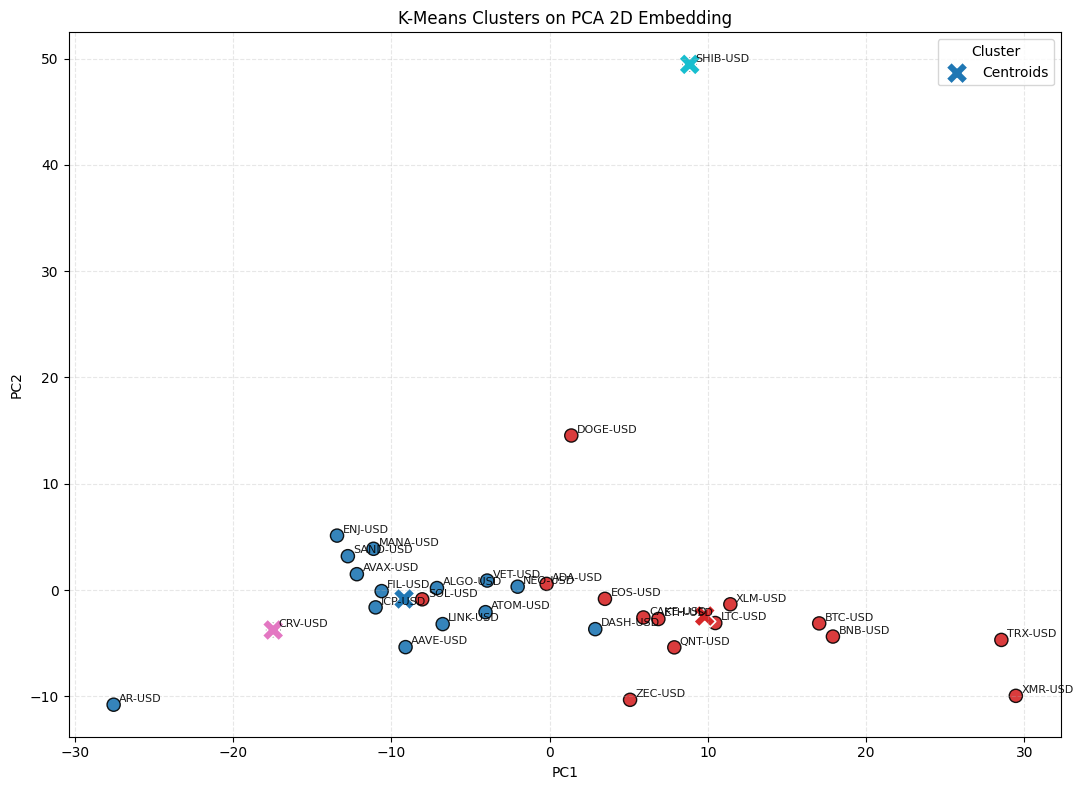

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plot_df = pd.DataFrame({
    "PC1": X_2d[:, 0],
    "PC2": X_2d[:, 1],
    "Cluster": labels,
    "Symbol": symbols
})

centroids_2d = plot_df.groupby("Cluster")[["PC1", "PC2"]].mean().values  # shape (k,2)

plt.figure(figsize=(11,8))
scatter = plt.scatter(plot_df["PC1"], plot_df["PC2"],
                      c=plot_df["Cluster"], cmap="tab10", s=90, edgecolor="k", alpha=0.9)

plt.scatter(centroids_2d[:,0], centroids_2d[:,1],
            c=np.arange(len(centroids_2d)), cmap="tab10", marker="X", s=250,
            edgecolor="white", linewidth=1.2, label="Centroids")

for i, row in plot_df.iterrows():
    plt.annotate(row["Symbol"], (row["PC1"], row["PC2"]),
                 fontsize=8, xytext=(4,2), textcoords="offset points", alpha=0.9)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clusters on PCA 2D Embedding")
plt.grid(True, linestyle="--", alpha=0.3)

handles, _ = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.legend(title="Cluster", loc="upper right")

plt.tight_layout()
plt.show()


since crv and ar are too volatile and considered as outliers, let's drop those rows

In [ ]:
outliers = ["CRV-USD", "AR-USD","ZEC-USD"]

df = df[~df["Symbol"].isin(outliers)].reset_index(drop=True)

print("Unique symbols after removal:", df["Symbol"].nunique())
print("Removed outliers:", outliers)


Unique symbols after removal: 27
Removed outliers: ['CRV-USD', 'AR-USD', 'ZEC-USD']


let's re run k means

In [ ]:
import plotly.graph_objects as go
import numpy as np

X_3d = X_pca[:, :3]

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x = X_3d[:,0], y = X_3d[:,1], z = X_3d[:,2],
    mode='markers+text',
    marker=dict(size=6, color=labels, colorscale='Viridis', opacity=0.9),
    text=symbols, textposition='top center', hovertext=symbols
))

centroids_3d = km.cluster_centers_[:, :3]
fig.add_trace(go.Scatter3d(
    x=centroids_3d[:,0], y=centroids_3d[:,1], z=centroids_3d[:,2],
    mode='markers+text',
    marker=dict(size=12, symbol='x', color='red'),
    text=[f'Centroid {i}' for i in range(len(centroids_3d))],
    hoverinfo='text'
))

fig.update_layout(title='Interactive 3D PCA + KMeans', scene=dict(
    xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'
))
fig.show()


#sample line chart of prices of btc

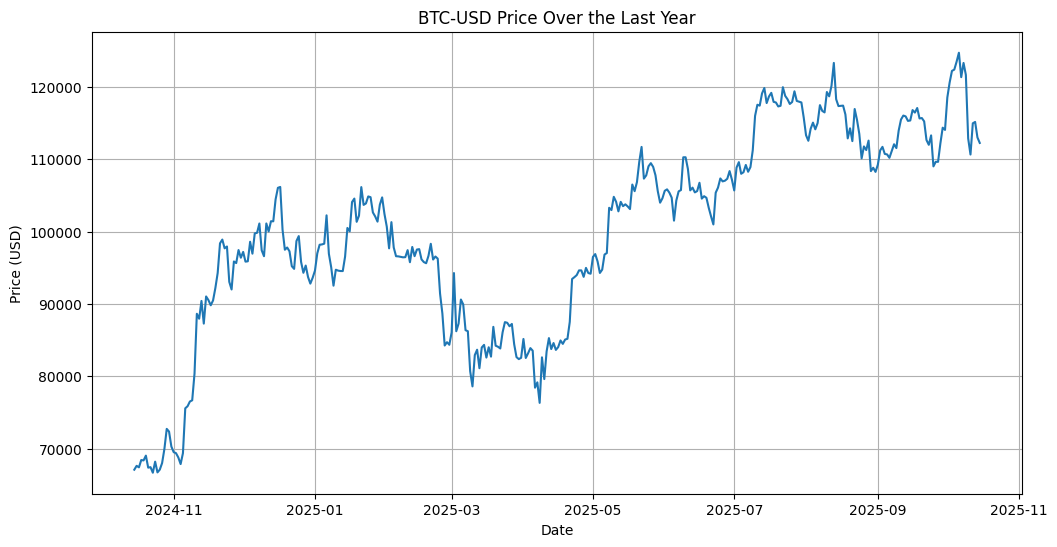

In [ ]:
import matplotlib.pyplot as plt

btc_df = df[df['Symbol'] == 'BTC-USD'].copy()

btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.set_index('Date')

one_year_ago = btc_df.index.max() - pd.DateOffset(years=1)
btc_last_year = btc_df.loc[one_year_ago:]

plt.figure(figsize=(12, 6))
plt.plot(btc_last_year.index, btc_last_year['Price'])
plt.title('BTC-USD Price Over the Last Year')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

#now start of modeling

In [ ]:
bzbhzb

NameError: name 'bzbhzb' is not defined